In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [74]:
df = pd.read_csv("laptops.csv")
len(df)

2160

In [75]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [76]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [77]:
df= df[['ram', 'storage', 'screen', 'final_price']]

## Exploratory data analysis

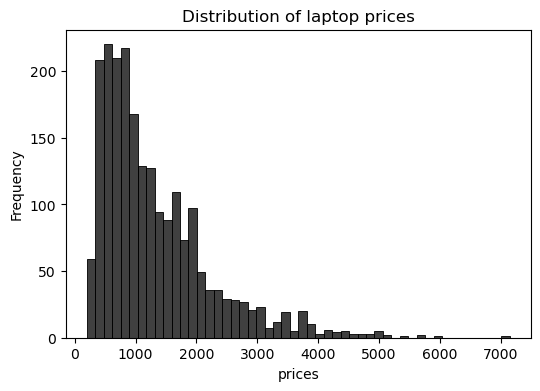

In [78]:
plt.figure(figsize=(6,4))
sns.histplot(df.final_price, bins = 50, color="black")
plt.ylabel("Frequency")
plt.xlabel("prices")
plt.title("Distribution of laptop prices")

plt.show()

## Question 1

In [79]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

## Question 2

In [80]:
df.ram.median()

16.0

## Validation framework

In [81]:
np.random.seed(42)

n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [82]:

y_val = df_val.final_price.values
y_train = df_train.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

## Linear Regression

In [116]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

 ## Question 3

In [85]:
def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [86]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)


In [87]:
y_pred = w_0 + X_train.dot(w)

In [88]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [89]:
rmse(y_train, y_pred)

602.3920520606714

In [90]:
X_val = prepare_X(df_val)

y_pred = w_0 + X_val.dot(w)

In [91]:
score_0fill = round(rmse(y_val, y_pred), 2)

Using mean as fill values

In [92]:
def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(df.screen.mean())
    X = df_num.values
    return X

In [93]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)


In [94]:
y_pred = w_0 + X_train.dot(w)

In [95]:
rmse(y_train, y_pred)

602.1844959403247

In [96]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [97]:
score_meanfill = round(rmse(y_val, y_pred), 2)

In [99]:
print(score_0fill, score_meanfill)

597.36 600.26


## Regularization

In [104]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [105]:
def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

## Question 4

In [108]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

In [112]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print("regularization_parameter %6s :" %r, round(rmse(y_val, y_pred), 2))

regularization_parameter      0 : 597.36
regularization_parameter   0.01 : 597.36
regularization_parameter    0.1 : 597.35
regularization_parameter      1 : 597.21
regularization_parameter      5 : 597.01
regularization_parameter     10 : 597.06
regularization_parameter    100 : 597.9


## Question 5

In [117]:
arr = []
for seed in range(10):
    np.random.seed(seed)

    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_val = df_val.final_price.values
    y_train = df_train.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)

    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    arr.append(score)
    


In [118]:
std = np.std(arr)

In [119]:
print(round(std, 3))

29.176


## Question 6

In [129]:
np.random.seed(9)

n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


In [130]:
y_val = df_val.final_price.values
y_train = df_train.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [131]:
df_full_train = pd.concat([df_train, df_val])

In [132]:
df_full_train = df_full_train.reset_index(drop=True)

In [133]:
X_full_train = prepare_X(df_full_train)

In [134]:
y_full_train = np.concatenate([y_train, y_val])

In [136]:
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)


In [137]:
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

608.6099822049559